<a href="https://colab.research.google.com/github/Higangssh/MNIST-Classifier/blob/main/Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
from torch import nn
from torch.optim import SGD
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [3]:
transform = transforms.ToTensor()

# 학습 데이터
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=256, shuffle=True)

# 테스트 데이터
testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=256, shuffle=False)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 17.4MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 477kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.38MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 7.74MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [4]:
class Model(nn.Module):
    def __init__(self, input_dim, n_dim):
        super().__init__()
        self.layer1 = nn.Linear(input_dim, n_dim)
        self.layer2 = nn.Linear(n_dim, n_dim)
        self.layer3 = nn.Linear(n_dim, 10)  # 출력이 10개
        self.act = nn.ReLU()

    def forward(self, x):
        x = torch.flatten(x, start_dim=1)  # [B, 1, 28, 28] → [B, 784]
        x = self.act(self.layer1(x))
        x = self.act(self.layer2(x))
        x = self.layer3(x)
        return x

model = Model(28*28, 1024).to('cuda')

In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr=0.001)

In [6]:
def accuracy(model, dataloader):
    model.eval()
    cnt, acc = 0, 0
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to('cuda'), labels.to('cuda')
            preds = model(inputs)
            preds = torch.argmax(preds, dim=-1)
            cnt += labels.size(0)
            acc += (preds == labels).sum().item()
    model.train()
    return acc / cnt


In [7]:
n_epochs = 100
train_accs = []
test_accs = []

for epoch in range(n_epochs):
    total_loss = 0.
    for inputs, labels in trainloader:
        inputs, labels = inputs.to('cuda'), labels.to('cuda')

        optimizer.zero_grad()
        preds = model(inputs)
        loss = criterion(preds, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    train_acc = accuracy(model, trainloader)
    test_acc = accuracy(model, testloader)
    train_accs.append(train_acc)
    test_accs.append(test_acc)

    print(f"Epoch {epoch:3d} | Loss: {total_loss:.4f} | Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")


Epoch   0 | Loss: 538.2354 | Train Acc: 0.2626 | Test Acc: 0.2583
Epoch   1 | Loss: 534.3803 | Train Acc: 0.3580 | Test Acc: 0.3566
Epoch   2 | Loss: 530.3592 | Train Acc: 0.4218 | Test Acc: 0.4228
Epoch   3 | Loss: 526.0463 | Train Acc: 0.4703 | Test Acc: 0.4729
Epoch   4 | Loss: 521.3022 | Train Acc: 0.5107 | Test Acc: 0.5145
Epoch   5 | Loss: 516.0037 | Train Acc: 0.5426 | Test Acc: 0.5433
Epoch   6 | Loss: 510.0143 | Train Acc: 0.5692 | Test Acc: 0.5690
Epoch   7 | Loss: 503.1666 | Train Acc: 0.5924 | Test Acc: 0.5947
Epoch   8 | Loss: 495.3443 | Train Acc: 0.6140 | Test Acc: 0.6177
Epoch   9 | Loss: 486.2776 | Train Acc: 0.6318 | Test Acc: 0.6341
Epoch  10 | Loss: 475.8784 | Train Acc: 0.6487 | Test Acc: 0.6544
Epoch  11 | Loss: 463.9712 | Train Acc: 0.6638 | Test Acc: 0.6698
Epoch  12 | Loss: 450.4048 | Train Acc: 0.6767 | Test Acc: 0.6830
Epoch  13 | Loss: 435.1170 | Train Acc: 0.6879 | Test Acc: 0.6928
Epoch  14 | Loss: 418.1927 | Train Acc: 0.6954 | Test Acc: 0.7015
Epoch  15 

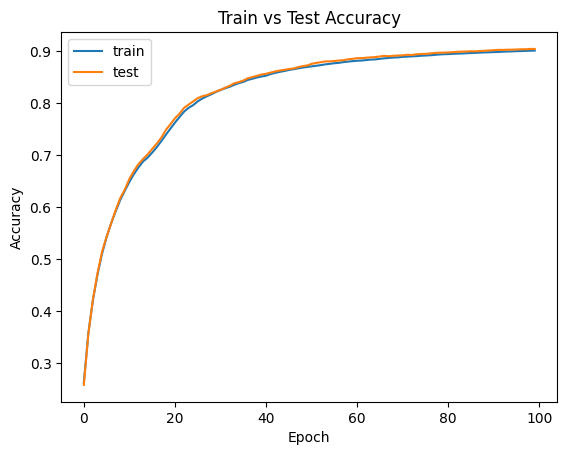

In [8]:
def plot_acc(train_accs, test_accs, label1='train', label2='test'):
    x = np.arange(len(train_accs))

    plt.plot(x, train_accs, label=label1)
    plt.plot(x, test_accs, label=label2)

    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title("Train vs Test Accuracy")
    plt.show()

plot_acc(train_accs, test_accs)